In [19]:
import pandas as pd
import numpy as np
import random
import math 
import matplotlib.pyplot as plt

# initialized random centroids from our dataset


#df1 = pd.read_csv('/content/drive/Shareddrives/CSC373_DMP_Wu_Chenyang/DMP_Clustering/Data/Iris_student.csv',header = None)
#df1 = pd.read_csv('/content/drive/Shareddrives/CSC373_DMP_Wu_Chenyang/DMP_Clustering/Data/separated_2d.csv')
df1 = pd.read_csv('/content/drive/Shareddrives/CSC373_DMP_Wu_Chenyang/DMP_Clustering/Data/separated_2d_mixed.csv')
df1 = df1.drop(df1.index[0])
df1 = df1.drop(df1.columns[0], 1)


df1 = df1.astype(float)

df1.head()



,F1,F2
1,36.0,35.0
2,28.0,39.0
3,28.0,26.0
4,34.0,34.0
5,30.0,27.0


In [20]:

# decide the number of K as our total number of centroids 
K = 3
# Create the initial centroid
init_centroids = random.sample(range(0, len(df1)), K)

init_centroids

[5, 30, 57]

In [21]:

# Find the first centroid randomly, and append it into the array of centroids

centroids = []
for i in init_centroids:
  centroids.append(df1.loc[i])

centroids = np.array(centroids)
# print(arr_centroids)
X = np.array(df1)


In [22]:

# This function is served as the euclidean distance calculation function
def euc_distance(X1, X2):
  # I originally want to use the regular formula to calculate the distance,
  # however, since we are dealing with a four dimentional vector, the distance 
  # function in the numpy library could perfectly do the job. 
  dis = np.linalg.norm(X1-X2)
  return dis

#This function tries to find the nearest centroid of a data point.
def nearest_centroid(init_c, X):
  # this declare this complete centroid, which ought to be the final result
  complete_centroid = []
  # This loop loops through every data points of the data frame, find out the
  # distance of those points to each centroid, and check for the minimum distance
  for i in X:
    dis = []
    for j in init_c:
      dis.append(euc_distance(i,j))
    # After we calculate the distance, we only want to find the minimum among them,
    # and keep the minimum in the record. Argmin function of numpy could help us
    # to find the minimum among them, then I will append it to the result.
    complete_centroid.append(np.argmin(dis))
  return complete_centroid
      

# This function mainly optimizes the centroid movement, to find out the optimum centroids

def move_centroid(cluster, X):
  new_centroids = []
  # here, a new dataframe is created by concatenating the original dataframe, with
  # their corresponding clusters
  new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster, columns=['cluster'])],
                    axis=1)
  # print(new_df.head())
  
  # This loop will find the mean between original cluster (the last column), and 
  # the new centroid
  for c in set(new_df['cluster']):
    current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
    cluster_mean = current_cluster.mean(axis=0)
    new_centroids.append(cluster_mean)
  return new_centroids, new_df

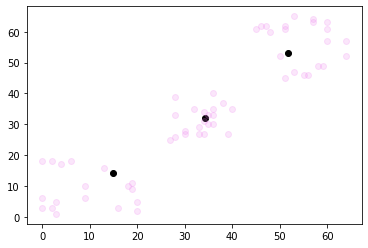

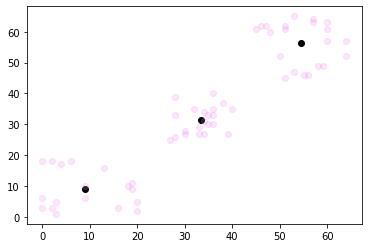

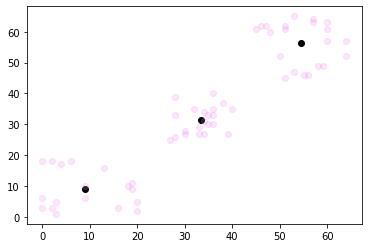

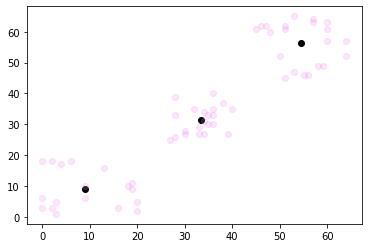

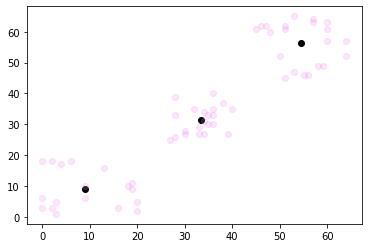

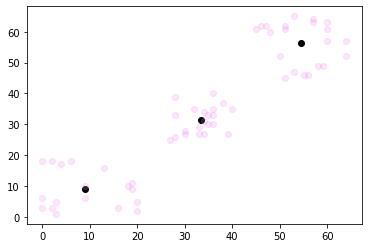

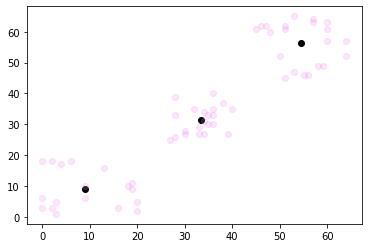

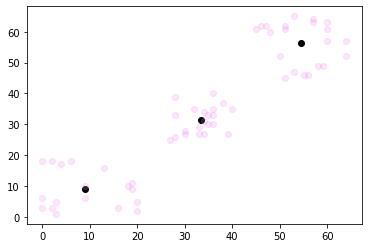

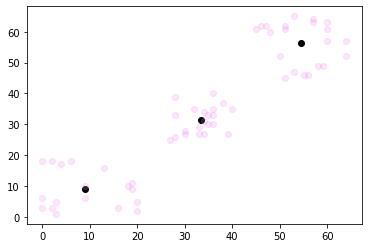

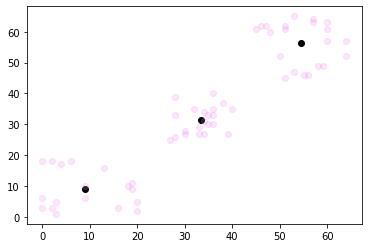

In [23]:

# This loop will iterate certain number of time to get the most optimized centroid
for i in range(10):
  
  # get the closest centroid based the euclidean distance
  get_centroids = nearest_centroid(centroids, X)
  # move the positions of centroids accordingly
  centroids, new_df = move_centroid(get_centroids, X)


  
  # plot shows the movement of these centroids
  plt.figure()
  plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
  plt.scatter(X[:, 0], X[:, 1], alpha=0.2, color = 'violet')
  plt.show()
  # This position of these centroids will move as the iteration continues 

  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


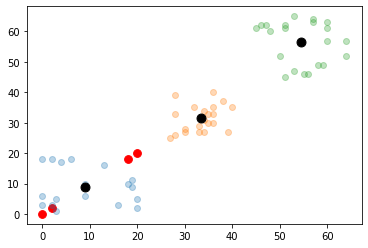

In [24]:

#print(new_df)
#row = new_df[new_df['cluster'] == 1]
arr_centroids = np.array(centroids)
total_distance = []


for i in range(K):
  anomaly_coord = []
  rows = np.array(new_df[new_df['cluster'] == i])
  cluster_distance = []
  for coord in rows:
    coord = np.delete(coord,-1)
    #print(coord)
    #print(arr_centroids[i])
    new_dist = euc_distance(coord,arr_centroids[i])
    if new_dist >= 12:
      anomaly_coord.append(coord)
      
    cluster_distance.append(new_dist)
  total_distance.append(cluster_distance)
  
  anomaly_coord = np.array(anomaly_coord)
  plt.scatter(anomaly_coord[:], anomaly_coord[:], color = 'r', s = 60)  
  plt.scatter(rows[:, 0], rows[:, 1], alpha=0.3)

total_distance = np.array(total_distance)
# print(total_distance.shape)

  


plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black', s=80)
plt.show()




# plt.scatter(np.array(new_df)[:, 0], np.array(new_df)[:, 1], color='violet')

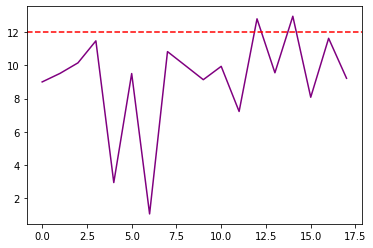

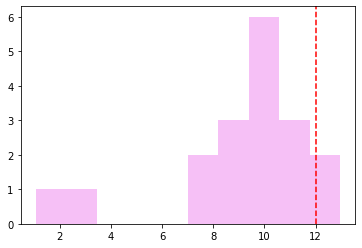

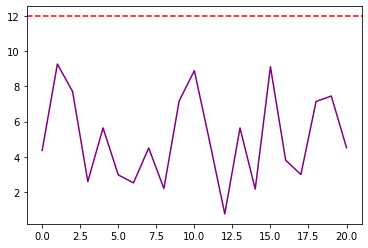

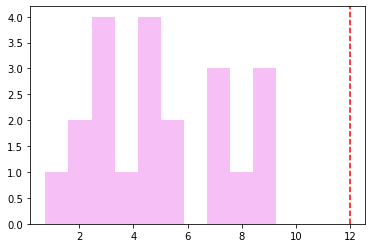

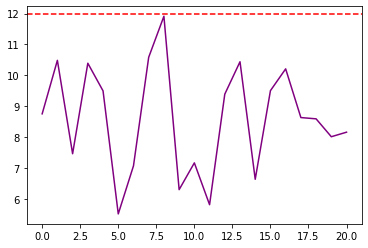

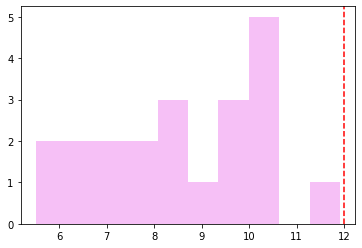

In [25]:



# decide which points should be classified as anomaly points



for i in range(K):
  # for j in total_distance[i]

  plt.figure()
  plt.plot(total_distance[i],'purple')
  plt.axhline(y=12, color='r', linestyle='--')
  plt.show

  plt.figure()
  plt.hist(total_distance[i], color = 'violet', alpha = 0.5)
  plt.axvline(x = 12,color='r', linestyle='--')
  plt.show

  
